# Baseline Model

This notebook contains three baseline models: Random Forest, Logistic Regression, and Naive Bayes. Out of them, Logistic Regression had the highest F1 Score.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
%matplotlib inline
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, model_selection, svm
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc, classification_report
import pickle

## Importing X and y from `nlp_preprocessing.ipynb`

In [2]:
X_lem = pickle.load(open('../pickle/X_lem.pkl', 'rb'))
y_lem = pd.read_pickle('../pickle/y_lem.pkl')

In [3]:
# setting up stop words
stop_words = set(stopwords.words('english'))

## Train-Test Split & Vectorize

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem, test_size=0.20, random_state=15)

# using tf_idf vectorizor
tfidf = TfidfVectorizer(stop_words= stop_words, ngram_range=(1,2))

In [5]:
# sparse matrix format with 265K stored elements
tfidf_data_train = tfidf.fit_transform(X_train)
tfidf_data_test = tfidf.transform(X_test)

In [6]:
## pickling X_train for future use
pickle_out = open("../pickle/X_train.pkl","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

In [7]:
## pickling tfidf_data_train for future use
pickle_out = open("../pickle/tfidf_data_train.pkl","wb")
pickle.dump(tfidf_data_train, pickle_out)
pickle_out.close()

In [8]:
# taking a quick look of the non zero elements
non_zero_cols = tfidf_data_train.nnz / float(tfidf_data_train.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 13.364420457984465
Percentage of columns containing ZERO: 0.9998720483637183


99.9% of the columns contain a zero, meaning that's a very sparse matrix

## Baseline Random Forest

In [9]:
rf_baseline = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0)
# adding class_weight='balanced' increased accuracy & precision but decreased F1

In [10]:
rf_baseline.fit(tfidf_data_train, y_train)
rf_test_preds = rf_baseline.predict(tfidf_data_test)

In [11]:
rf_precision = precision_score(y_test, rf_test_preds)
rf_recall = recall_score(y_test, rf_test_preds)
rf_f1_score = f1_score(y_test, rf_test_preds)
rf_f1_weighted = f1_score(y_test, rf_test_preds, average='weighted')

In [12]:
# printing evaluation metrics up to 4th decimal place
print('Testing Metrics for Random Forest Baseline with Lemmatization Features')
print('Precision: {:.4}'.format(rf_precision))
print('Recall: {:.4}'.format(rf_recall))
print('F1 Score: {:.4}'.format(rf_f1_score))

Testing Metrics for Random Forest Baseline with Lemmatization Features
Precision: 0.4128
Recall: 0.1613
F1 Score: 0.232


In [13]:
# creating dictionary with all metrics
metric_dict = {}
metric_dict['Baseline Random Forest'] = {'precision': rf_precision, 'recall': rf_recall, 'f1_score': rf_f1_score, 'weighted_f1': rf_f1_weighted}

(2.5, -0.5)

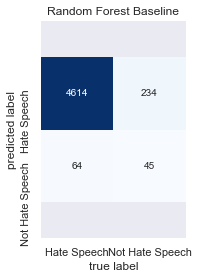

In [14]:
mat = confusion_matrix(y_test, rf_test_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Hate Speech', 'Not Hate Speech'], yticklabels=['Hate Speech', 'Not Hate Speech'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Random Forest Baseline')

# fixing matplotlib heatmap cutoff issue
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

There are a lot of false positives, which can be expected with this dataset.

## Baseline Naive Bayes

In [15]:
baseline_bayes = MultinomialNB(alpha = .01)

In [16]:
baseline_bayes.fit(tfidf_data_train, y_train)
bayes_test_preds = baseline_bayes.predict(tfidf_data_test)

In [17]:
bayes_precision = precision_score(y_test, bayes_test_preds)
bayes_recall = recall_score(y_test, bayes_test_preds)
bayes_f1_score = f1_score(y_test, bayes_test_preds)
bayes_f1_weighted = f1_score(y_test, bayes_test_preds, average='weighted')

In [18]:
# printing evaluation metrics up to 4th decimal place
print('Testing Metrics for Naive Bayes Baseline with Lemmatization Features')
print('Precision: {:.4}'.format(bayes_precision))
print('Recall: {:.4}'.format(bayes_recall))
print('F1 Score: {:.4}'.format(bayes_f1_score))

Testing Metrics for Naive Bayes Baseline with Lemmatization Features
Precision: 0.4118
Recall: 0.1254
F1 Score: 0.1923


In [19]:
metric_dict['Baseline Naive Bayes'] = {'precision': bayes_precision, 'recall': bayes_recall, 'f1_score': bayes_f1_score, 'weighted_f1': bayes_f1_weighted}

(2.5, -0.5)

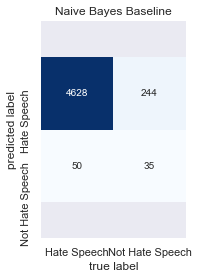

In [20]:
mat = confusion_matrix(y_test, bayes_test_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Hate Speech', 'Not Hate Speech'], yticklabels=['Hate Speech', 'Not Hate Speech'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Naive Bayes Baseline')

# fixing matplotlib heatmap cutoff issue
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

## Baseline SVM

In [21]:
SVM_baseline = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', class_weight='balanced')

In [22]:
%%time 
# this cell takes about 1 minute to run
# fit the training dataset on the classifier
SVM_baseline.fit(tfidf_data_train, y_train)
# predict the labels on validation dataset
SVM_test_preds = SVM_baseline.predict(tfidf_data_test)


Wall time: 37.5 s


In [23]:
SVM_precision = precision_score(y_test, SVM_test_preds)
SVM_recall = recall_score(y_test, SVM_test_preds)
SVM_f1_score = f1_score(y_test, SVM_test_preds)
SVM_f1_weighted = f1_score(y_test, SVM_test_preds, average='weighted')

In [24]:
# printing evaluation metrics up to 4th decimal place
print('Testing Metrics for SVM Baseline with Lemmatization Features')
print('Precision: {:.4}'.format(SVM_precision))
print('Recall: {:.4}'.format(SVM_recall))
print('F1 Score: {:.4}'.format(SVM_f1_score))

Testing Metrics for SVM Baseline with Lemmatization Features
Precision: 0.3609
Recall: 0.4373
F1 Score: 0.3955


In [25]:
metric_dict['Baseline SVM'] = {'precision': SVM_precision, 'recall': SVM_recall, 'f1_score': SVM_f1_score, 'weighted_f1': SVM_f1_weighted}

(2.5, -0.5)

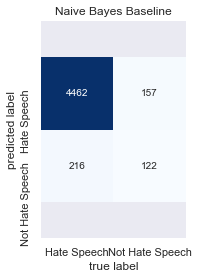

In [26]:
mat = confusion_matrix(y_test, SVM_test_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Hate Speech', 'Not Hate Speech'], yticklabels=['Hate Speech', 'Not Hate Speech'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Naive Bayes Baseline')

# fixing matplotlib heatmap cutoff issue
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

## Evaluation Metrics for All Baseline Models

In [27]:
pd.DataFrame.from_dict(metric_dict, orient='index')

,precision,recall,f1_score,weighted_f1
Baseline Random Forest,0.412844,0.161290,0.231959,0.927249
Baseline Naive Bayes,0.411765,0.125448,0.192308,0.925487
Baseline SVM,0.360947,0.437276,0.395462,0.928112


Overall, the SVM model performed the best across unweighted and weighted F1. However, there is still work to be done to bring that score up higher. Next we'll try grid search on that model.

#### Weighted F1 Score

A weighted F1 score can account for the class imbalance in labels by calculating metrics for each label, and finding their average weighted by support (the number of true instances for each label). This results in a F1 score that is not between precision and recall.

We can see that a baseline SVM had the highest F1 score.